In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pynbody.plot.sph as sph

In [5]:
filepth = 'Starting-Stuff/IsoB_1000/GLX.0'
timestep = (['1000'])

In [6]:
filenom = (filepth+timestep[0])
dno = timestep[0]
gal = pynbody.load(filenom) 
print (gal.dm)

t_now =  gal.properties['time'].in_units('Myr')
timestr = str( np.round(float(t_now),1) )

<FamilySubSnap "Starting-Stuff\IsoB_1000\GLX.01000::dm" len=1000000>


In [7]:
#Put CoM in middle
pynbody.analysis.angmom.faceon(gal)

<Transformation faceon>

<>:8: SyntaxWarning: invalid escape sequence '\;'
<>:9: SyntaxWarning: invalid escape sequence '\;'
<>:8: SyntaxWarning: invalid escape sequence '\;'
<>:9: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_11240\3577652742.py:8: SyntaxWarning: invalid escape sequence '\;'
  plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_11240\3577652742.py:9: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)


plotting gas


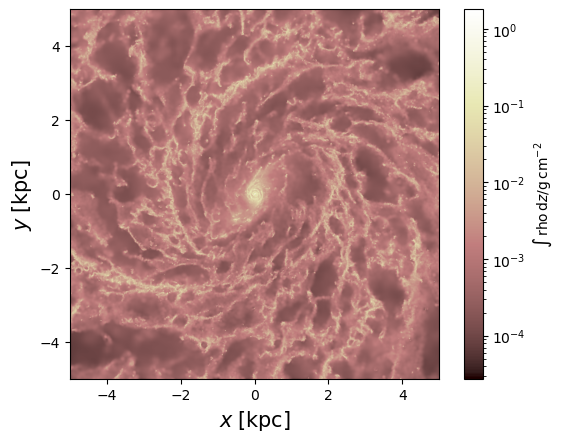

In [5]:
print ('plotting gas')
#vmin=3e-4
#vmax=8e-2
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)
imG=sph.image(gal.gas,qty='rho',width='10 kpc',cmap='pink',units='g cm^-2',subplot=axG,show_cbar=True)
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)
#plt.ylim(-3.5,3.5)
axG.annotate(timestr+'Myr',xy=(0.7,0.9),xycoords='axes fraction',color='white',fontsize=13)
plt.show()

In [ ]:
print ('plotting gas')
#vmin=3e-4
#vmax=8e-2
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)
imG=sph.image(gal.gas,qty='rho',width='10 kpc',cmap='pink', resolution=1000,
                       units='g cm^-2',subplot=axG,show_cbar=True, return_array=True)
# adding one more zero to resolution breaks my pc

plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)
#plt.ylim(-3.5,3.5)
axG.annotate(timestr+'Myr',xy=(0.7,0.9),xycoords='axes fraction',color='white',fontsize=13)
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\;'
<>:12: SyntaxWarning: invalid escape sequence '\;'
<>:11: SyntaxWarning: invalid escape sequence '\;'
<>:12: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_11240\253681518.py:11: SyntaxWarning: invalid escape sequence '\;'
  plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_11240\253681518.py:12: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)


plotting gas


In [8]:
x_coords, y_coords = np.indices(imG.shape)
x_coords = x_coords.flatten()
y_coords = y_coords.flatten()
gal_flattened = imG.flatten()

resolution = (1000-1)

centre = (resolution/2, resolution/2)
x_coords = x_coords - centre[0]
y_coords = y_coords - centre[1]

rho = np.sqrt((x_coords ** 2) + (y_coords ** 2))
#rho = np.log10(rho)
phi = np.angle(x_coords + 1j * y_coords)
phi = np.rad2deg(phi)

AttributeError: 'NoneType' object has no attribute 'shape'

In [123]:
def norm(arr, n):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

def bin(arr, bins):
    #arr = norm(arr, 60)
    norm = plt.hist(arr, bins=bins)[0]
    return norm

In [151]:
from astropy.visualization import ZScaleInterval


z = ZScaleInterval()
z1, z2 = z.get_limits(imG)

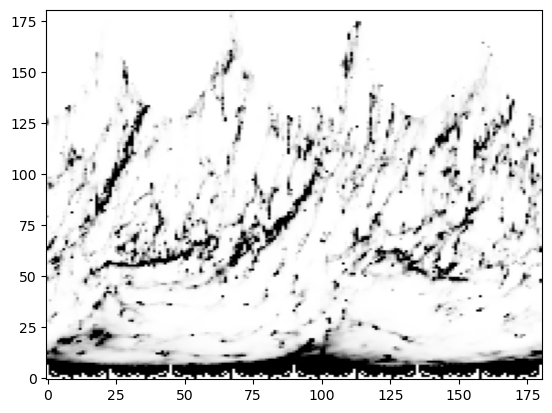

In [152]:
from matplotlib import colors

new_phi = norm(phi, 180) #(phi + 90) / 2 #bin(phi, 60)
new_rho = norm(rho, 180) #bin(np.log10(rho), 60)

phi_range = int(np.max(new_phi) - np.min(new_phi)) + 1
rho_range = int(np.max(new_rho)- np.min(new_rho)) + 1

xint = np.rint(new_phi).astype(int)
yint = np.rint(new_rho).astype(int)
im4 = np.zeros((rho_range, phi_range))
counts = np.zeros((rho_range, phi_range))

mask = gal_flattened != 0

np.add.at(im4, (yint[mask], xint[mask]), gal_flattened[mask])
np.add.at(counts, (yint[mask], xint[mask]), 1)

im4[counts != 0] = im4[counts != 0] / counts[counts != 0]

plt.clf()
plt.imshow(im4, cmap = "gray_r", norm=colors.PowerNorm(2, vmin =z1, vmax=z2), aspect= "auto", origin='lower') #, ))

C:\Users\Shaurya\AppData\Local\Temp\ipykernel_31580\2504072813.py:3: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.imshow(im4, cmap = "gray_r", norm=colors.PowerNorm(2, vmin =z1, vmax=z2), aspect= "auto", origin='lower')


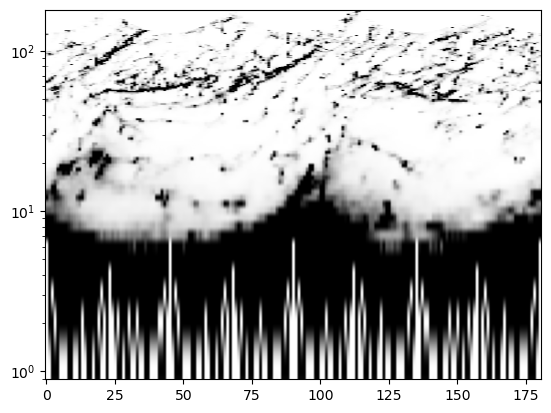

In [153]:
plt.clf()
plt.yscale('log')
plt.imshow(im4, cmap = "gray_r", norm=colors.PowerNorm(2, vmin =z1, vmax=z2), aspect= "auto", origin='lower')


In [8]:
x = gal.gas['x']
y = gal.gas['y']

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

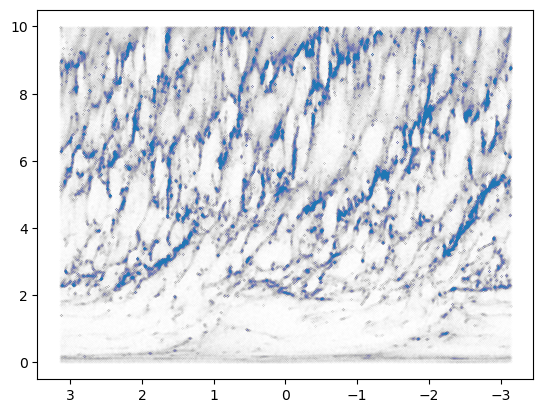

In [6]:
plt.clf()
plt.plot(phi, rho, marker='.', linestyle='None', markersize=0.1, alpha=0.05)
plt.gca().invert_xaxis()


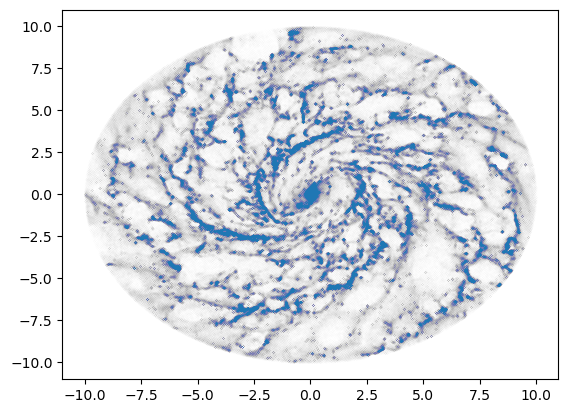

In [7]:
plt.plot(x, y, marker='.', linestyle='None', markersize=0.1, alpha=0.05)

In [9]:
# dens = gal.gas['rho']
# dens = np.mean(dens)
# avg_dist = (dens * 2) ** (-1/3) 


# according to internet the average distance between particles in spiral arms
# is 1.5-3 times the average inter-particle distance in the galaxy
# which is proportional to n^(-1/3)

num = x.shape[0]
dens = num/(np.pi * radii**2)
avg_dist = (dens * 1.5) ** (-1/3) 

In [10]:
avg_dist*1.5 # can use softening length instead

#gas softening length 0.01 kpc
# use stellar soft length 0.05 kpc

# maybe exclude centre cause of high density of particles

0.07374902304139028

In [ ]:
from sklearn.cluster import HDBSCAN
# also look at HDBSCAN

clf = HDBSCAN()
X = np.column_stack((rho, phi))

clf.fit(X)

In [11]:
from sklearn.cluster import DBSCAN
# also look at HDBSCAN

clf = DBSCAN(eps=avg_dist*1.5, min_samples= 1000)
X = np.column_stack((rho, phi))

clf.fit(X)

DBSCAN(eps=0.07374902304139028, min_samples=1000)

In [12]:
for i in range(-1, clf.labels_.max() + 1):
    print(i, np.sum(clf.labels_ == i))

-1 728480
0 12758
1 86955
2 29480
3 86493
4 4367
5 27261
6 23509
7 14855
8 39954
9 62587
10 4207
11 12612
12 16355
13 82364
14 1774
15 2053
16 2801
17 3812
18 9980
19 6616
20 14920
21 4269
22 6584
23 29716
24 21809
25 12845
26 2530
27 33942
28 8357
29 5451
30 6831
31 15839
32 4103
33 6708
34 10122
35 13488
36 3916
37 13353
38 13897
39 6239
40 2550
41 16905
42 7440
43 5243
44 1994
45 2226
46 2323
47 1762
48 2740
49 2037
50 7897
51 5971
52 1777
53 5594
54 1951
55 2217
56 8473
57 6135
58 7066
59 5011
60 4074
61 4158
62 3364
63 1993
64 3859
65 7399
66 3969
67 3278
68 2699
69 2059
70 4590
71 2413
72 2214
73 4533
74 1621
75 4592
76 3145
77 2016
78 3284
79 2763
80 2897
81 2069
82 3086
83 1854
84 1944
85 2252
86 1833
87 2735
88 1911
89 1882
90 2795
91 1858
92 1779
93 3861
94 5515
95 1290
96 1468
97 1303
98 4795
99 1654
100 3145
101 2115
102 1559
103 2006
104 1455
105 1536
106 3302
107 1472
108 1958
109 1709
110 1961
111 1479
112 2231
113 1317
114 1275
115 1689
116 1202
117 1047
118 1415
119 17

<Figure size 640x480 with 0 Axes>

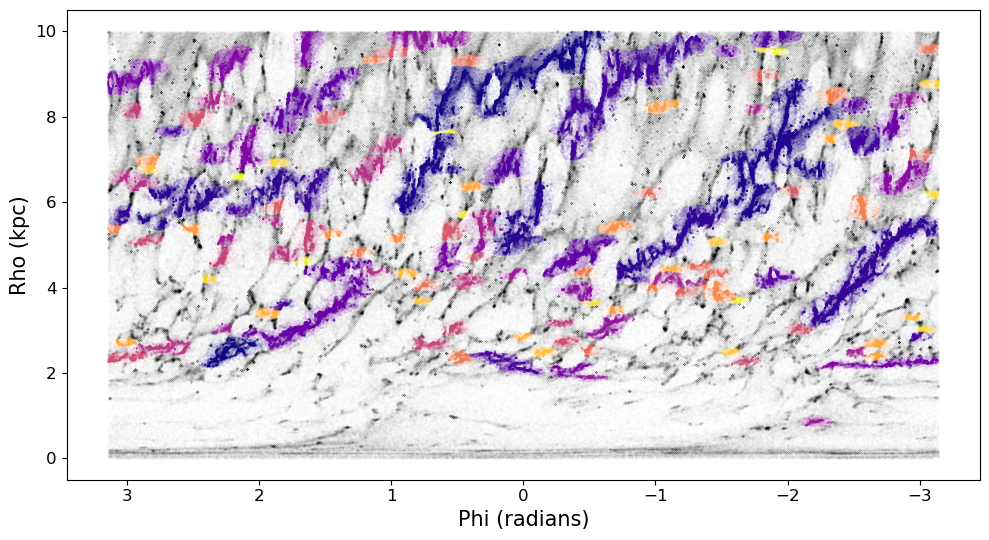

In [13]:
outliers = clf.labels_ == -1
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((clf.labels_+1)/np.max(clf.labels_+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.1)
    ax.set_xlabel('Phi (radians)', fontsize=fs)
    ax.set_ylabel('Rho (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,5.5))
dbscan(ax)
fig.gca().invert_xaxis()
fig.tight_layout()

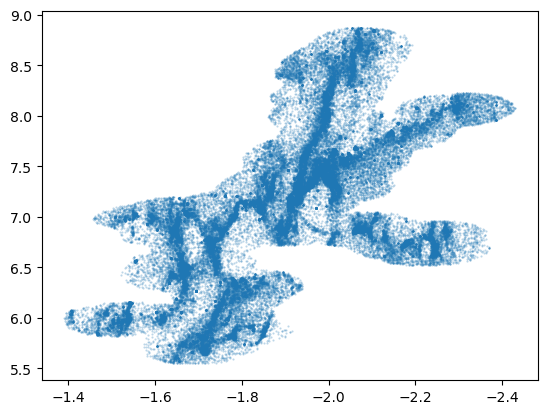

In [13]:
plt.clf()
labels = clf.labels_
plt.scatter(X[labels == 3,1], X[labels == 3,0], marker='.', s=1, alpha=0.3)
plt.gca().invert_xaxis()

## Next steps
1. Filter small clusters out -> can use stuff like number density etc.
2. Find a way to combine nearby large clusters manually...
    If i increase the eps argument itll just have one cluster
3. Try out HDBSCAN (heirachical clustering) to see if that works

### Actually calculating Flocculency
1. Determine equation of arm -> determine length, width, density (maybe)
2. Find some ways to use those values to get a single number out that represents flocculency.

In [18]:
# for each label/part spiral arm, we can determine the position
# or equation of the arm using python curve fitting
# to calculate flocculency, plan is to use the length of each arm
# compared to the total length of the spiral arms OR the radius of the galaxy
# so like sum over (R - r_i)/R and then divide by number of arms

In [14]:
from scipy.optimize import curve_fit

def line(x, m, b):
    return m * x + b


labels = clf.labels_

opt, cov = [], []

for id in range(0, labels.max() + 1):

    xdata = X[labels == id,1]
    ydata = np.log10(X[labels == id,0])

    popt, pcov = curve_fit(line, xdata, ydata)
    opt.append(popt)
    cov.append(pcov)
    
opt = np.array(opt)
cov = np.array(cov)

#for i in range(0, np.max(clf.labels_)):
    

In [20]:
from scipy.spatial import distance_matrix

def consistentcy(opt, cov, id):
    popt, pcov = opt[id], cov[id]
    pm2, pm1 = popt[0] + pcov[0, 0] ** 0.5, popt[0] - pcov[0, 0] ** 0.5
    pb2, pb1 = popt[1] + pcov[1, 1] ** 0.5, popt[1] - pcov[1, 1] ** 0.5 
    
    m2, m1 = opt[:,0] + cov[:, 0, 0] ** 0.5, opt[:,0] - cov[:, 0, 0] ** 0.5
    b2, b1 = opt[:, 1] + cov[:, 1, 1] ** 0.5, opt[:, 1] + cov[:, 1, 1] ** 0.5
    
    s1 = (pm1 > m2) + (pm2 < m1)
    s2 = (pb1 > b2) + (pb2 < b1)
    
    return ~(s1*s2)

def inrange(x, xs, y, ys):
    s1 = (x - xs) > (y + ys)
    s2 = (y - ys) > (x + xs)
    s1 = np.any(s1)
    s2 = np.any(s2)
    
    return ~(s1*s2)

""" def closeby(labels, X, id):
    data = X[labels == id]
    cent, std = np.mean(data, axis=0), np.std(data, axis=0)*0.06
    
    statem = []
    
    for i in range(0, labels.max() + 1):
        data2 = X[labels == i]
        cent2, std2 = np.mean(data2, axis=0), np.std(data2, axis=0)*0.06
        
        statem.append(inrange(cent, std, cent2, std2))
    
    return np.array(statem) """
    
def closeby(labels, X, id, threshold=avg_dist*1.5):
    data = X[labels == id]
    bottom = np.percentile(data, 1, axis=0)
    top = np.percentile(data, 99, axis=0)
    
    statem = []
    for i in range(0, labels.max() + 1):
        data2 = X[labels == i]
        bottom2 = np.percentile(data2, 1, axis=0)
        top2 = np.percentile(data2, 99, axis=0)
        
        dist1 = np.sqrt(np.sum((bottom - top2)**2))
        dist2 = np.sqrt(np.sum((bottom2 - top)**2))
        
        
        if dist1 < threshold or dist2 < threshold:
            statem.append(True)
        else: statem.append(False)
    
    return np.array(statem)

In [21]:
same_cluster = []
for id in range(0, labels.max() + 1):
    same_cluster.append(consistentcy(opt, cov, id) * closeby(labels, X, id))
    
same_cluster = np.array(same_cluster)

In [22]:
import numpy as np
import networkx as nx

G = nx.from_numpy_array(same_cluster)

# Get connected components
components = list(nx.connected_components(G))
new_labels = np.zeros_like(labels) - 1

for new_id, component in enumerate(components):
    for old_id in component:
        new_labels[labels == old_id] = new_id

len(components)

132

<Figure size 640x480 with 0 Axes>

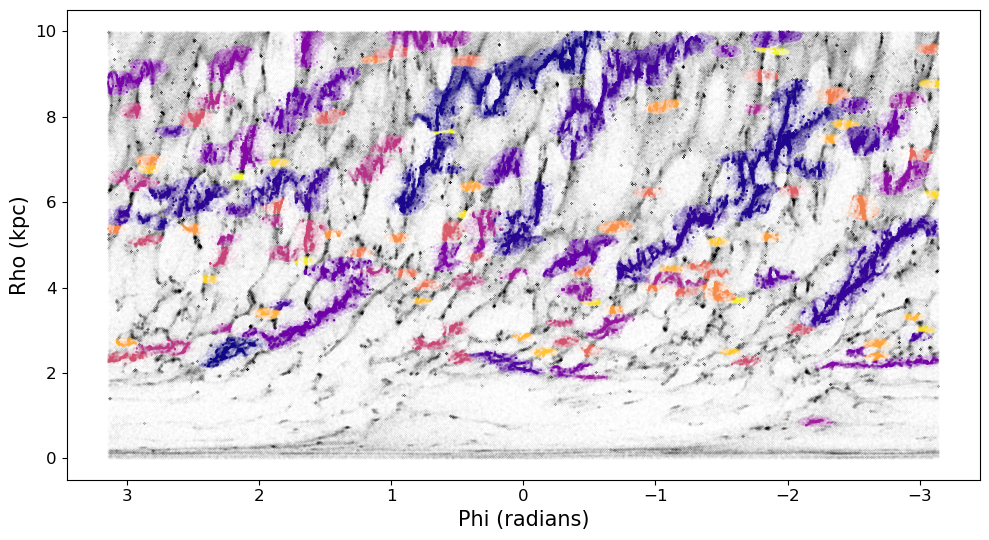

In [23]:
outliers = new_labels == -1
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((new_labels+1)/np.max(new_labels+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.1)
    ax.set_xlabel('Phi (radians)', fontsize=fs)
    ax.set_ylabel('Rho (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,5.5))
dbscan(ax)
fig.gca().invert_xaxis()
fig.tight_layout()

In [43]:
np.abs(cov[:, 0, 0]/opt[:, 0])[130]

np.float64(0.000355305433770867)

In [45]:
new_new_labels = new_labels.copy()

for i in range(-1, new_labels.max() + 1):
    print(i, np.sum(new_labels == i))
    #if np.sum(new_labels == i) < 5000:
        #new_new_labels[new_labels == i] = -1
        
    if np.abs(cov[i, 0, 0]/opt[i, 0]) > 1e-4:
        new_new_labels[new_labels == i] = -1
    
np.unique(new_new_labels, return_counts=True)

-1 728480
0 12758
1 86955
2 29480
3 86493
4 4367
5 27261
6 23509
7 14855
8 39954
9 62587
10 4207
11 12612
12 16355
13 82364
14 1774
15 2053
16 2801
17 3812
18 9980
19 6616
20 14920
21 4269
22 6584
23 29716
24 21809
25 12845
26 2530
27 33942
28 8357
29 5451
30 8868
31 15839
32 4103
33 6708
34 10122
35 13488
36 3916
37 13353
38 13897
39 6239
40 2550
41 16905
42 7440
43 5243
44 1994
45 2226
46 2323
47 1762
48 2740
49 7897
50 5971
51 1777
52 5594
53 1951
54 2217
55 8473
56 6135
57 7066
58 5011
59 4074
60 4158
61 3364
62 1993
63 3859
64 7399
65 6764
66 3278
67 2699
68 2059
69 4590
70 2413
71 2214
72 4533
73 1621
74 4592
75 3145
76 2016
77 3284
78 2763
79 2897
80 2069
81 3086
82 1854
83 4196
84 1833
85 2735
86 3600
87 1882
88 1858
89 1779
90 3861
91 5515
92 1290
93 1468
94 1303
95 4795
96 1654
97 3145
98 2115
99 1559
100 2006
101 1455
102 1536
103 3302
104 1472
105 1958
106 1709
107 1961
108 1479
109 2231
110 1317
111 1275
112 1202
113 1047
114 1415
115 1729
116 1814
117 1102
118 1379
119 13

(array([ -1,   0,   1,   2,   3,   4,   5,   7,   8,   9,  11,  13,  18,
         19,  20,  22,  23,  24,  25,  27,  28,  30,  31,  32,  34,  37,
         38,  41,  42,  43,  45,  51,  53,  56,  57,  59,  68,  70,  76,
         78, 100, 106]),
 array([1025814,   12758,   86955,   29480,   86493,    4367,   27261,
          14855,   39954,   62587,   12612,   82364,    9980,    6616,
          14920,    6584,   29716,   21809,   12845,   33942,    8357,
           8868,   15839,    4103,   10122,   13353,   13897,   16905,
           7440,    5243,    2226,    1777,    1951,    6135,    7066,
           4074,    2059,    2413,    2016,    2763,    2006,    1709]))

<Figure size 640x480 with 0 Axes>

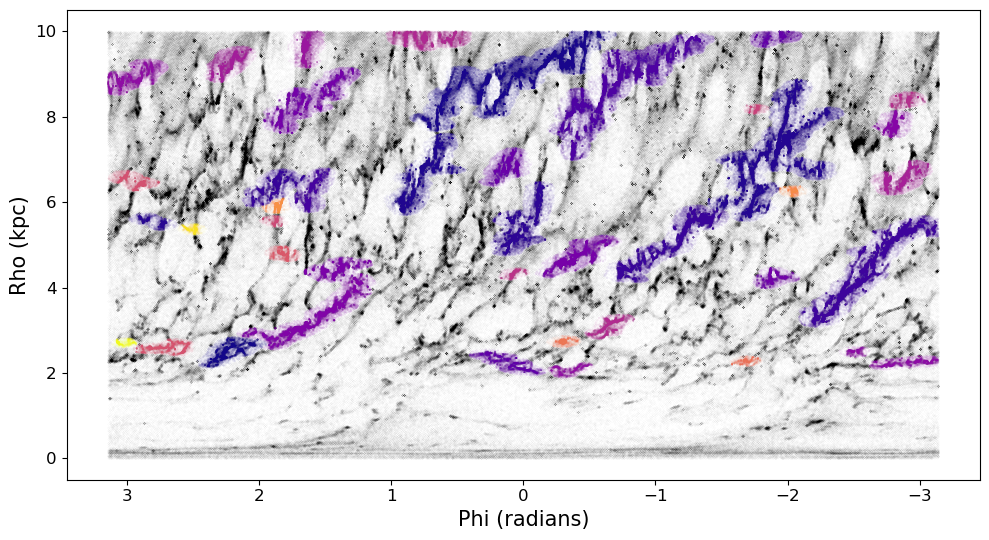

In [46]:
outliers = new_new_labels == -1
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((new_new_labels+1)/np.max(new_new_labels+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.1)
    ax.set_xlabel('Phi (radians)', fontsize=fs)
    ax.set_ylabel('Rho (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,5.5))
dbscan(ax)
fig.gca().invert_xaxis()
fig.tight_layout()

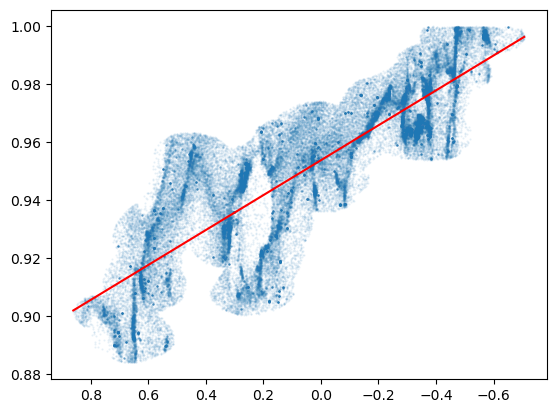

In [20]:
plt.clf()
linex = np.linspace(np.min(xdata), np.max(xdata), 100)
liney = line(linex, popt[0], popt[1])

plt.scatter(xdata, ydata, marker='.', s=1, alpha=0.1)
plt.plot(linex, liney, c="red")
plt.gca().invert_xaxis()

In [26]:
xdata.shape

(86955,)